
# Python graphics:  Matplotlib fundamentals

We illustrate three approaches to graphing data with Python's Matplotlib package:    

* [Approach 1](#Approach-1:--Apply-plot-methods-to-dataframes):  Apply a `plot()` method to a dataframe
* [Approach 2](#Approach-2:--plt.plot):  Use the `plot(x,y)` function from `matplotlib.pyplot`
* [Approach 3](#Approach-3:--Create-figure-objects-and-apply-methods):  Create a figure object and apply methods to it

The last one is the least intuitive but also the most useful.  We work up to it gradually.  This [book chapter](https://davebackus.gitbooks.io/test/content/graphs1.html) covers the same material with more words and fewer pictures.  

## Reminders

* **Packages**:  collections of tools that we access with `import` statements
* **Pandas**:  Python's data package 
* **Objects** and **methods**:  we apply the method `justdoit` to the object `x` with `x.justdoit`
* **Dataframe**:  a spreadsheet-like data structure 
* **Series**:  a single variable 
* **Jupyter**:  an environment for combining code with text and graphics 

## Preliminaries 

### Jupyter 

Look around, what do you see?  Check out the **menubar** at the top:  File, Edit, etc.  Also the **toolbar** below it.  Click on Help -> User Interface Tour for a tour of the landscape.  

The **cells** below come in two forms.  Those labeled Code (see the menu in the toolbar) are Python code.  Those labeled Markdown are text.  

### Markdown 


Markdown is a simplified version of html ("hypertext markup language"), the language used to construct basic websites.  html was a great thing in 1995, but now that the excitement has warn off we find it painful.  Markdown, however, has a zen-like simplicity and beauty.  Here are some things we can do with it:

* Headings.  Large bold headings are marked by hashes (`#`).  One hash for first level (very large), two for second level (a little smaller), three for third level (smaller still), four for fourth (the smallest).  Try these in a Markdown cell to see how they look:

   ```
   # Data Bootcamp sandbox
   ## Data Bootcamp sandbox
   ### Data Bootcamp sandbox
   ```

  Be sure to run the cell when you're done (`shift enter`).

* Bold and italics.  If we put a word or phrase between double asterisks, it's displayed in bold.  Thus `**bold**` displays as **bold**.  If we use single asterisks, we get italics:  `*italics*` displays as *italics*.

* Bullet lists.  If we want a list of items marked by bullets, we start with a blank line and mark each item with an asterisk on a new line:

  ```markdown
  * something
  * something else
  ```

  Try it and see.

* Links.   We construct a link with the text in square brackets and the url in parentheses immediately afterwards.  Try this one:

  ```
  [Data Bootcamp course](http://databootcamp.nyuecon.com/)
  ```

We can find more information about Markdown under Help.  Or use your Google fu.  We like the [Daring Fireball](https://daringfireball.net/projects/markdown/) description.


Markdown is ubiquitous.  This book, for example, is written in Markdown.  Look [here](https://github.com/NYUDataBootcamp/Book) for a list of chapter files.  Click on one to see how it displays.  Click on the Raw button at the top to see the Markdown file that produced it.

**Exercise.** Create a description cell in Markdown at the top of your notebook.  It should include your name and a description of what you're doing in the notebook.  For example: "Joan Watson's notes on the Data Bootcamp Matplotlib notebook" and a date.  *Bonus points:*  Add a link.

**Exercise.**  Add two new cells.  In the first one, add the statement `import pandas as pd`, labelled as code.  Run it.  Use the second cell to find documentation for `pd.read_csv`.

### Import packages


In [5]:
import sys                             # system module
import pandas as pd                    # data package
import pandas_datareader.data as web   # data input package 
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt        # pyplot module
import datetime as dt                  # date and time module
# make plots show up in notebook
%matplotlib inline                     

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', mpl.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Pandas version:  0.19.0
Matplotlib version:  1.5.1
Today:  2017-02-25


**Comment.**  When you run the code cell above, its output appears below it.  

**Exercise.** Enter `pd.read_csv?` in the empty cell below.  Run the cell (Cell at the top, or shift-enter).  Do you see the documentation?  This is the Jupyter version of help in Spyder's IPython console.  

### Create dataframes to play with 

* US GDP and consumption 
* World Bank GDP per capita for several countries 
* Fama-French equity returns 

In [2]:
gdp  = [13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3]
pce  = [8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7]
year = list(range(2003,2014))        # use range for years 2003-2013

# Note that we set the index
us = pd.DataFrame({'gdp': gdp, 'pce': pce}, index=year)
print(us.head(3))

          gdp     pce
2003  13271.1  8867.6
2004  13773.5  9208.2
2005  14234.2  9531.8


In [3]:
code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

wbdf = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)
wbdf

,country,gdppc
USA,United States,53.1
FRA,France,36.9
JPN,Japan,36.3
CHN,China,11.9
IND,India,5.4
BRA,Brazil,15.0
MEX,Mexico,16.5


**Comment.**  In the previous cell, we used the `print()` function to produce output.  Here we just put the name of the dataframe.  The latter displays the dataframe -- and formats it nicely -- **if it's the last statement in the cell**.  

In [11]:
import pandas_datareader.data as web 
#import pandas.io.data as web
ff = web.DataReader('F-F_Research_Data_factors', 'famafrench')[1]
ff.columns = ['xsm', 'smb', 'hml', 'rf']
ff['rm'] = ff['xsm'] + ff['rf']
ff = ff[['rm', 'rf']]               # extract rm (market) and rf (riskfree)
ff.head(5)

,rm,rf
Date,,
2010,17.49,0.12
2011,0.48,0.04
2012,16.34,0.06
2013,35.22,0.02
2014,11.72,0.02


**Comment.**  If you see a warning in pink it is probably telling us that the Pandas DataReader will be spun off into a separate package in the near future.  

**Exercise.** What kind of object is `wbdf`?  What are its column and row labels?

**Exercise.** What is `ff.index`?  What does that tell us?

## Digression:  Graphing in Excel

Remind yourself that we need to choose:

* Data.  We would highlight a block of cells in a spreadsheet.
* Chart type.  Lines, bars, scatter plots, and so on.
* `x` and `y` variables.  Typically we graph some `y` variable -- or perhaps several of them -- against an `x` variable, with `x` on the horizontal axis and `y` on the vertical axis.  We need to tell Excel which is which.

We'll see the same in Matplotlib.

##  Approach 1:  Apply plot methods to dataframes

The simplest way to produce graphics from a dataframe is to apply a plot method to it.  Simple is good, we do this a lot.

If we compare this to Excel, we will see that a number of things are preset for us:

* Data.  By default (meaning, if we don't do anything to change it) the data consists of the whole dataframe.
* Chart type.  We'll see below that we have options for lines, bars, or other things.
* `x` and `y` variables.  By default, the `x` variable is the dataframe's index and the `y` variables are the columns of the dataframe -- all of them that can be plotted (e.g. columns with a numeric dtype).

We can change all of these things, just as we can in Excel, but that's the starting point.

Let's do some examples, see how they work.

### US GDP and consumption

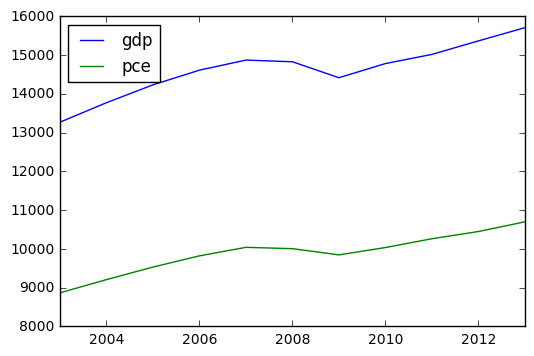

In [12]:
# try this with US GDP
us.plot()

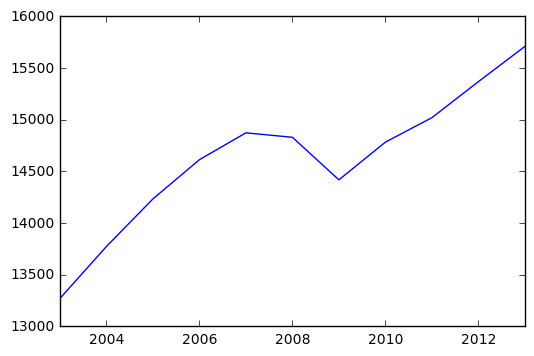

In [13]:
# do GDP alone
us['gdp'].plot()

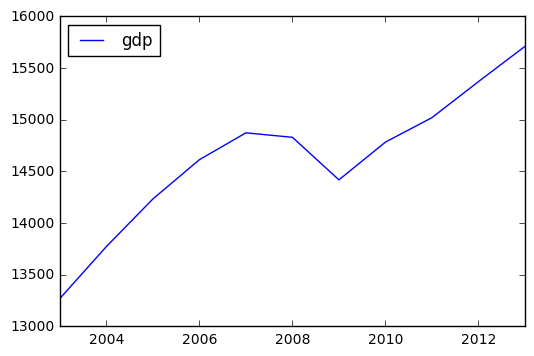

In [14]:
us.plot(y="gdp")

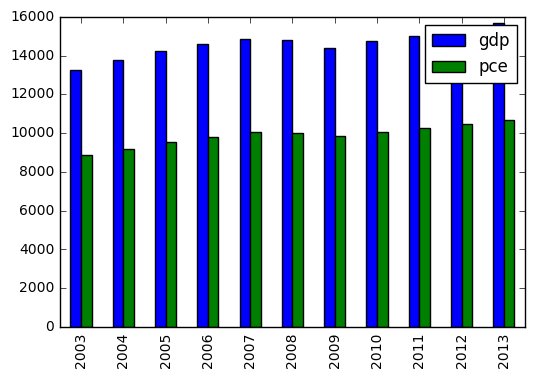

In [15]:
# bar chart 
us.plot(kind='bar')

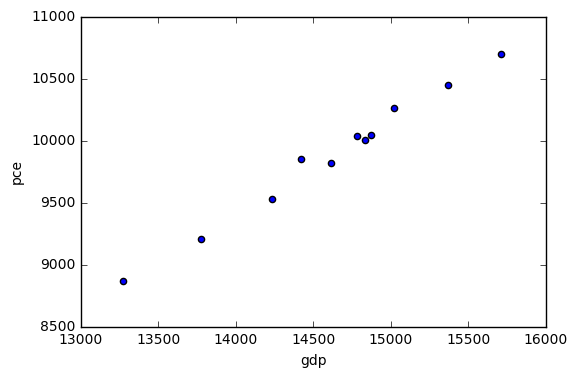

In [16]:
# scatter plot 
# we need to be explicit about the x and y variables: x = 'gdp', y = 'pce'
us.plot.scatter('gdp', 'pce')

**Exercise.** Enter `us.plot(kind='bar')` and `us.plot.bar()` in separate cells.  Show that they produce the same bar chart.  

**Exercise.**  Add each of these arguments, one at a time, to `us.plot()`:  

* `kind='area'`
* `subplots=True`
* `sharey=True`
* `figsize=(3,6)`
* `ylim=(0,16000)`

What do they do?

**Exercise.** Type `us.plot?` in a new cell.  Run the cell (shift-enter or click on the run cell icon).  What options do you see for the `kind=` argument?  Which ones have we tried?  What are the other ones?  

### Fama-French asset returns 

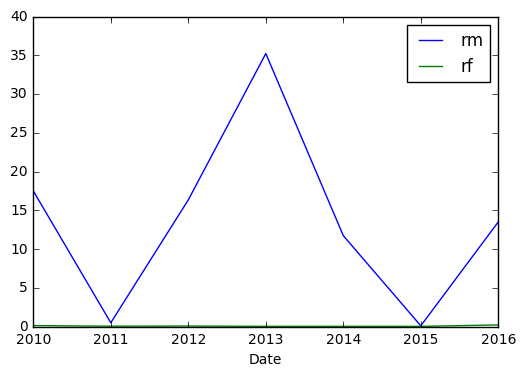

In [17]:
# now try a few things with the Fama-French data
ff.plot()

**Exercise.** What do each of the arguments do in the code below?  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8478a5e518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f8478a08898>], dtype=object)

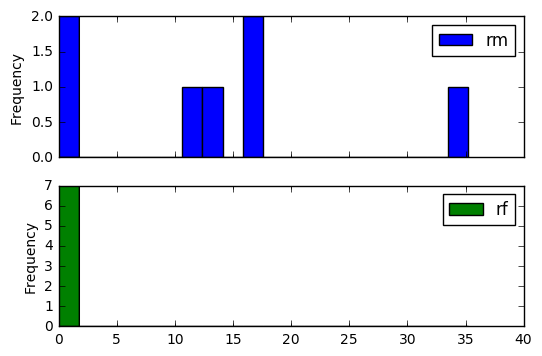

In [18]:
ff.plot(kind='hist',         
        bins=20,             
        subplots=True)       

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8478913ac8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f8478888208>], dtype=object)

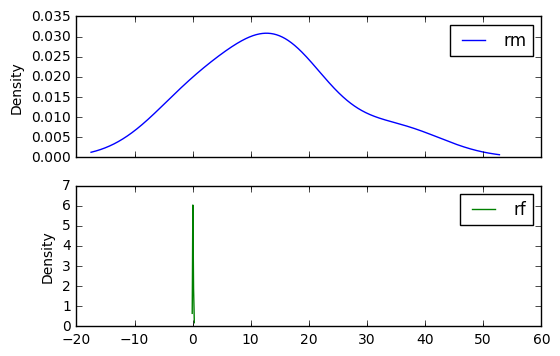

In [19]:
# "smoothed" histogram 
ff.plot(kind='kde', subplots=True, sharex=True)    # smoothed histogram ("kernel density estimate")

**Exercise.**  Let's see if we can dress up the histogram a little.  Try adding, one at a time, the arguments `title='Fama-French returns'`, `grid=True`, and `legend=False`.  What does the documentation say about them?  What do they do?  

**Exercise.**  What do the histograms tell us about the two returns?  How do they differ?  


**Exercise.**  Use the World Bank dataframe `wbdf` to create a bar chart of GDP per capita, the variable `'gdppc'`. *Bonus points:* Create a horizontal bar chart. Which do you prefer?  

## Approach 2:  `plt.plot`

Next up:  the popular `plot(x,y)` function from the pyplot module of Matplotlib.  We never use this and will go over it at high speed -- or perhaps not at all.

We import the pyplot module with

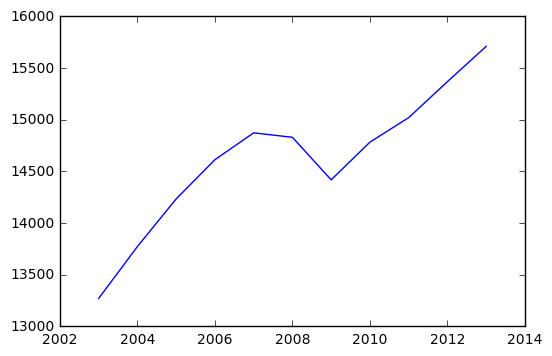

In [21]:
plt.plot(us.index, us['gdp'])

**Exercise.** What is the `x` variable here?  The `y` variable?  

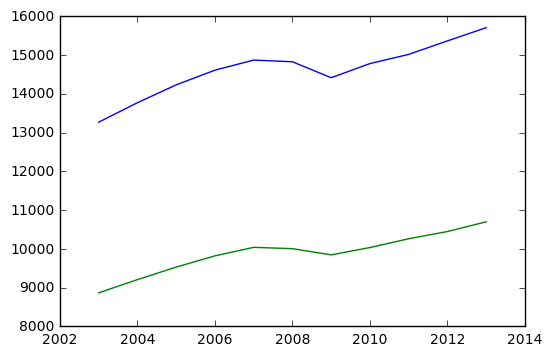

In [22]:
# we can do two lines together
plt.plot(us.index, us['gdp'])
plt.plot(us.index, us['pce'])

<Container object of 11 artists>

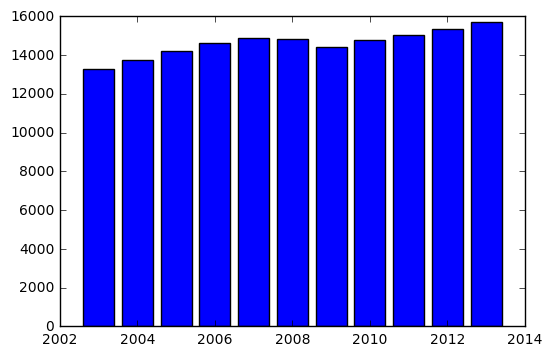

In [23]:
# or a bar chart 
plt.bar(us.index, us['gdp'], align='center')

**Exercise.** Experiment with 
```python
plt.bar(us.index, us['gdp'], 
        align='center', 
        alpha=0.65, 
        color='red', 
        edgecolor='green')
```
Play with the arguments one by one to see what they do.  Or use `plt.bar?` to look them up.  Add comments to remind yourself. *Bonus points:*  Can you make this graph even uglier?  

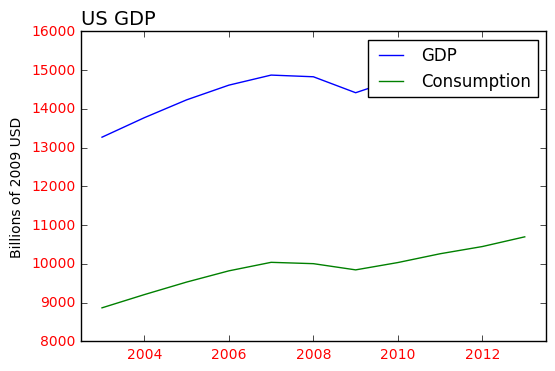

In [24]:
# we can also add things to plots 
plt.plot(us.index, us['gdp']) 
plt.plot(us.index, us['pce']) 

plt.title('US GDP', fontsize=14, loc='left') # add title
plt.ylabel('Billions of 2009 USD')           # y axis label 
plt.xlim(2002.5, 2013.5)                     # shrink x axis limits
plt.tick_params(labelcolor='red')            # change tick labels to red
plt.legend(['GDP', 'Consumption'])           # more descriptive variable namesDescribe what each of these arguments/parameters does.

**Comment.** All of these statements must be in the same cell for this to work.  

**Comment.** This is overkill -- it looks horrible -- but it makes the point that we control everything in the plot.  We recommend you do very little of this until you're more comfortable with the basics.  

**Exercise.** Add a `plt.ylim()` statement to make the `y` axis start at zero, as it did in the bar charts.  *Bonus points:*  Change the color to magenta and the linewidth to 2.  *Hint:*  Use `plt.ylim?` and `plt.plot?` to get the documentation.  

**Exercise.** Create a line plot for the Fama-French dataframe `ff` that includes both returns.  *Bonus points:* Add a title and label the y axis.  

## Approach 3:  Create figure objects and apply methods

This approach was mysterious to us at first, but it's now our favorite.  The idea is to generate an object -- two objects, in fact -- and apply methods to them to produce the various elements of a graph:  the data, their axes, their labels, and so on.

We do this -- as usual -- one step at a time.

**Create objects.**   We'll see these two lines over and over:

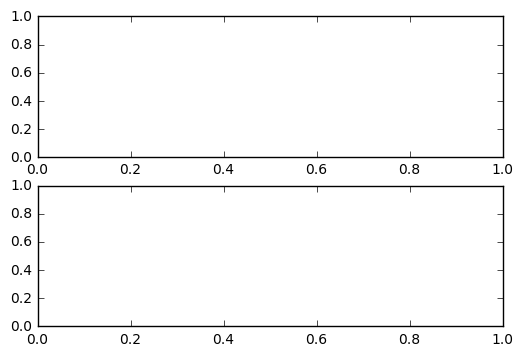

In [26]:
# create fig and ax objects
fig, ax = plt.subplots(2)

In [27]:
type(ax)

numpy.ndarray

**Exercise.** What do we have here?  What `type` are `fig` and `ax`?  

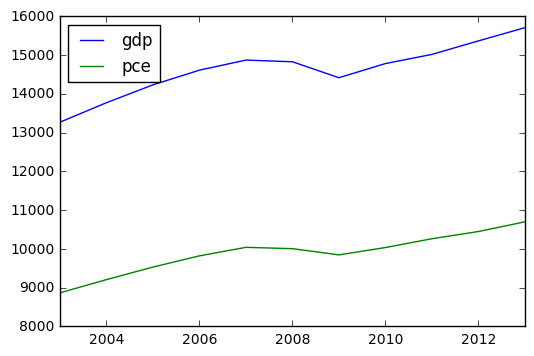

In [28]:
# let's try that again, this time with content  
# create objects 
fig, axe = plt.subplots()

# add things by applying methods to ax 
us.plot(ax=axe) 

**Comment.** Both of these statements must be in the same cell.  

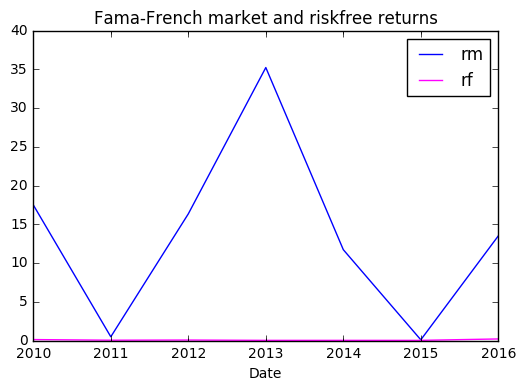

In [29]:
# Fama-French example 
fig, ax = plt.subplots()
ff.plot(ax=ax, 
        kind='line',                 # line plot 
        color=['blue', 'magenta'],   # line color 
        title='Fama-French market and riskfree returns')

**Exercise.**  Let's see if we can teach ourselves the rest:  

* Add the argument `kind='hist'` to convert this into a histogram.
* Add the argument `alpha=0.65` to the bar chart.  What does it do?  
* What would you change in the hisogram chart to make it look better?  Use the help facility to find options that might help.  Which ones appeal to you?  

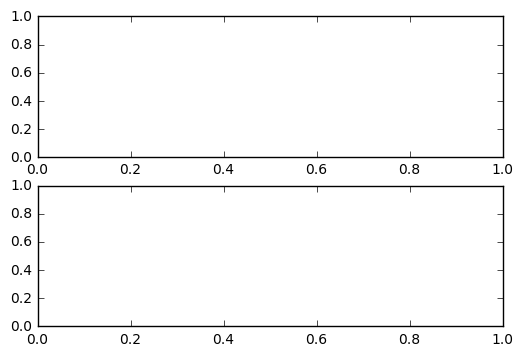

In [30]:
fig, ax = plt.subplots(2)

In [31]:
ax[0]

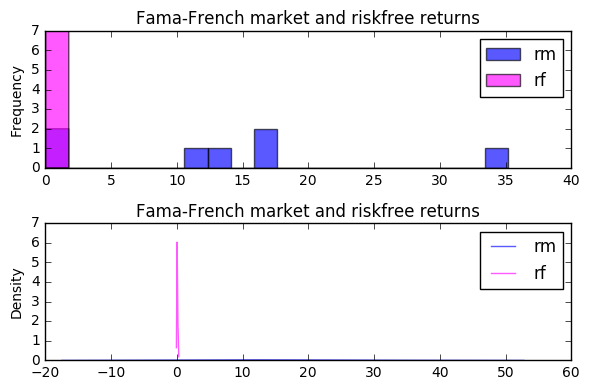

In [32]:
# Fama-French example 
fig, ax = plt.subplots(2)
ff.plot(ax=ax[0], 
        kind='hist',                 # line plot 
        color=['blue', 'magenta'],   # line color 
        alpha=0.65,
        bins=20,
        title='Fama-French market and riskfree returns')

ff.plot(ax=ax[1], 
        kind='kde',                 # line plot 
        color=['blue', 'magenta'],   # line color 
        title='Fama-French market and riskfree returns',
        alpha=0.65)

fig.tight_layout()

## Quick review of the bidding

Take a deep breath.  We've covered a lot of ground, let's take stock.  

We looked at three ways to use Matplotlib:

* Approach #1:  apply plot method to dataframe
* Approach #2:  use `plot(x,y)` function 
* Approach #3:  create `fig, ax` objects, apply plot methods to them

Same result, different syntax.  This is what each of them looks like applied to US GDP: 

```python
us['gdp'].plot()                   # Approach #1

plt.plot(us.index, us['gdp'])      # Approach #2

fig, ax = plt.subplots()           # Approach #3 
ax.plot(us.index, us['gdp'])  

# Or
fig, ax = plt.subplots()           # Approach #3 
us['gdp'].plot(ax=ax)
```

Each one produces the same graph.

Which one should we use?  **Use Approach #3.**  Really.  This is a case where choice is confusing.

We also suggest you not commit any of this to memory.  If you use end up using it a lot, you'll remember it.  If you don't, it's not worth remembering.  We typically start with examples anyway rather than creating new graphs from scratch.

## Bells and whistles

### Adding things to graphs

We have lots of choices.  Here's an example.

(0, 16000.0)

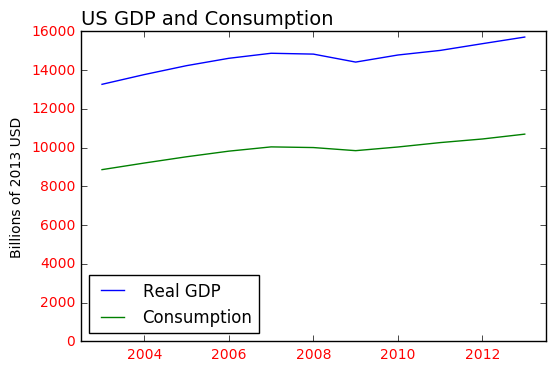

In [33]:
fig, ax = plt.subplots()

us.plot(ax=ax)       
ax.set_title('US GDP and Consumption', fontsize=14, loc='left')
ax.set_ylabel('Billions of 2013 USD')
ax.legend(['Real GDP', 'Consumption'], loc=0)  # more descriptive variable names 
ax.set_xlim(2002.5, 2013.5)                    # expand x axis limits
ax.tick_params(labelcolor='red')               # change tick labels to red
ax.set_ylim(0)

(Your results may differ, but we really enjoyed that.) 

**Exercise.** Use the `set_xlabel()` method to add an x-axis label.  What would you choose?  Or would you prefer to leave it empty?  

**Exercise.** Enter `ax.legend?` to access the documentation for the `legend` method.  What options appeal to you?  

**Exercise.**  Change the line width to 2 and the line colors to blue and magenta.  *Hint:*  Use `us.plot?` to get the documentation.  

**Exercise (challenging).** Use the `set_ylim()` method to start the `y` axis at zero.  *Hint:*  Use `ax.set_ylim?` to get the documentation.  

**Exercise.** Create a line plot for the Fama-French dataframe `ff` that includes both returns.  *Bonus points:* Add a title with the `set_title` method.  

(0, 16000.0)

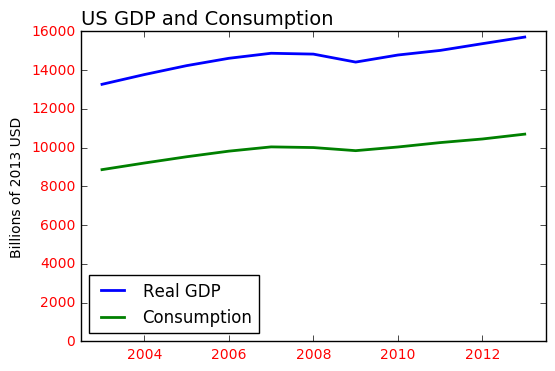

In [34]:
fig, ax = plt.subplots()

us.plot(ax=ax, lw=2)       
ax.set_title('US GDP and Consumption', fontsize=14, loc='left')
ax.set_ylabel('Billions of 2013 USD')
ax.legend(['Real GDP', 'Consumption'], loc=0)  # more descriptive variable names 
ax.set_xlim(2002.5, 2013.5)                    # expand x axis limits
ax.tick_params(labelcolor='red')               # change tick labels to red
ax.set_ylim(0)

### Multiple subplots 

Same idea, but we create a multidimensional `ax` and apply methods to each component. Here we redo the plots of US GDP and consumption.  

Object ax has dimension 4


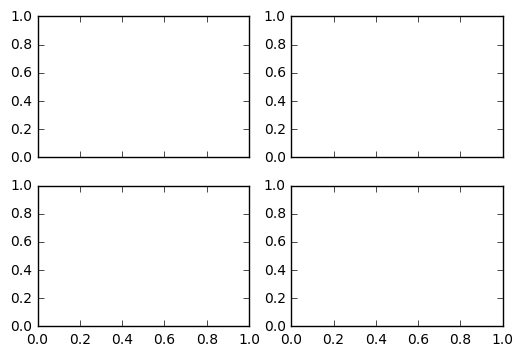

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
print('Object ax has dimension', ax.size)

Object ax has dimension 4


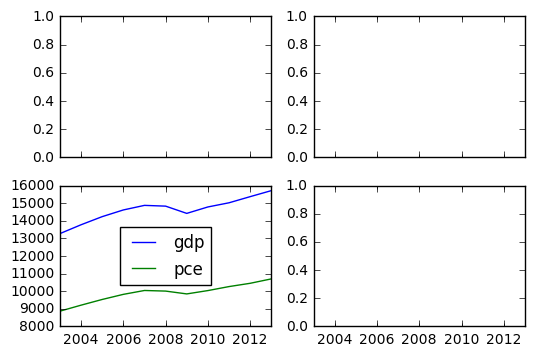

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
print('Object ax has dimension', ax.size)

us.plot(ax=ax[1, 0])

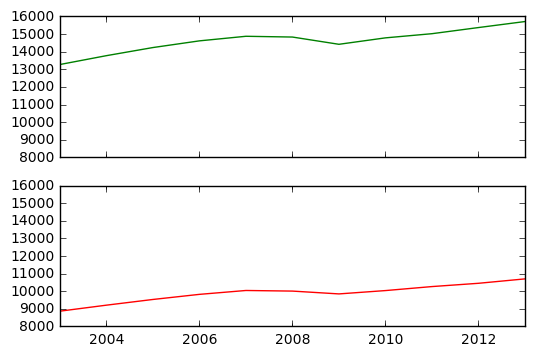

In [37]:
# now add some content 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

us['gdp'].plot(ax=ax[0], color='green')   # first plot
us['pce'].plot(ax=ax[1], color='red')     # second plot

## Examples

We conclude with examples that take data from the previous chapter and make better graphs than we did there.

### Student test scores (PISA) 

The international test scores often used to compare quality of education across countries.  

In [38]:
# data input 
import pandas as pd
url = 'http://dx.doi.org/10.1787/888932937035'
pisa = pd.read_excel(url, 
                     skiprows=18,     # skip the first 18 rows 
                     skipfooter=7,    # skip the last 7 
                     parse_cols=[0,1,9,13], # select columns 
                     index_col=0,     # set index = first column
                     header=[0,1]     # set variable names 
                     )
pisa = pisa.dropna()                          # drop blank lines 
pisa.columns = ['Math', 'Reading', 'Science'] # simplify variable names 

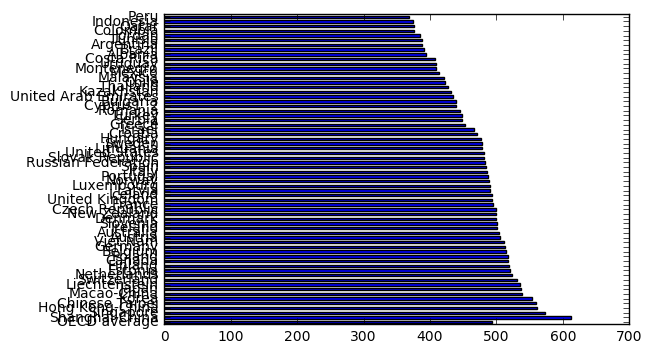

In [39]:
# bar chart of math scores 
fig, ax = plt.subplots()
pisa['Math'].plot(kind='barh', ax=ax)  

**Comment.** Yikes!  That's horrible!  What can we do about it? Any suggestions?

Let's make the figure taller.  The `figsize` argument has the form `(width, height)`.  The default is `(6, 4)`.  We want a tall figure, so we need to increase the height setting.  

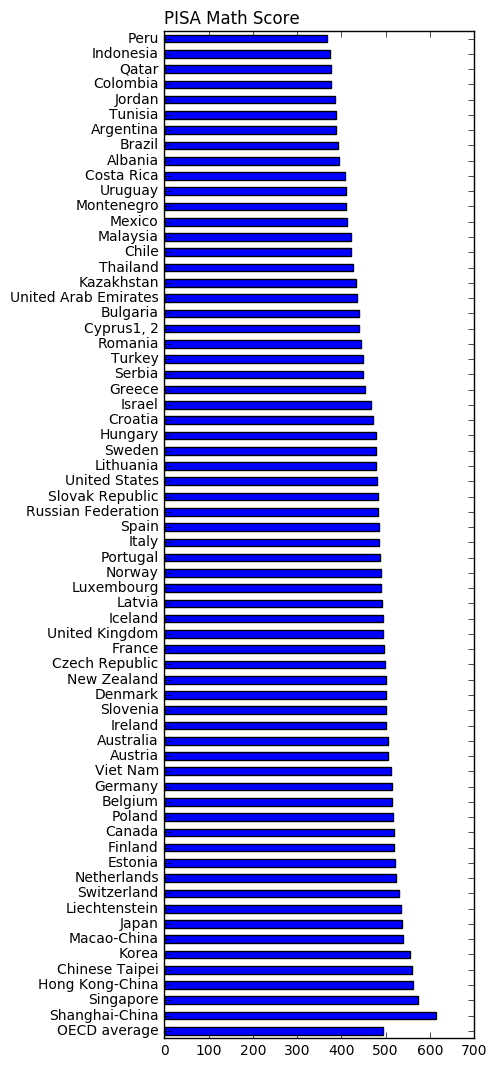

In [40]:
# make the plot taller 
fig, ax = plt.subplots(figsize=(4, 13))  # note figsize 
pisa['Math'].plot(kind='barh', ax=ax)  
ax.set_title('PISA Math Score', loc='left')

**Comment.** What if we wanted to make the US bar red?  This is **far too** complicated, but we used our Google fu and found [a solution](http://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python).  Remember: The solution to many problems is Google fu + patience.    

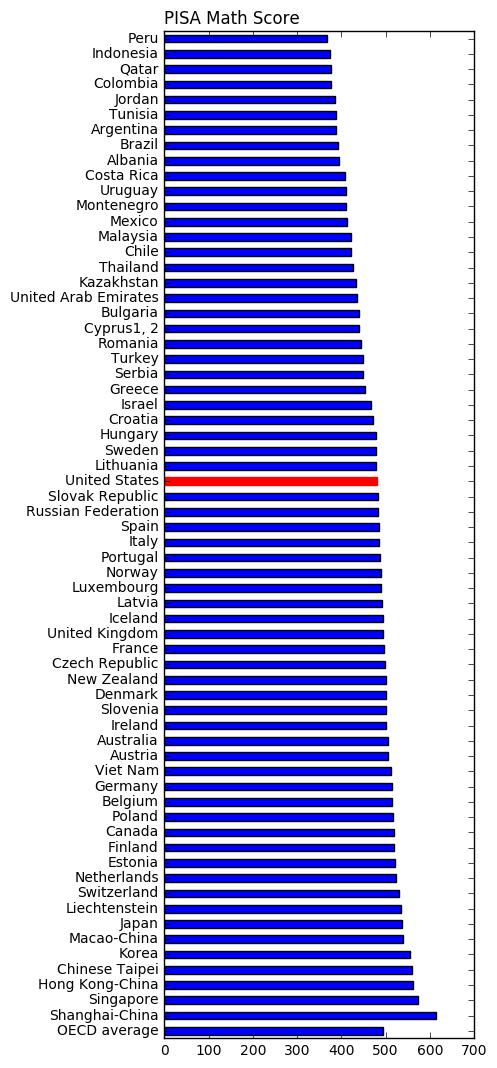

In [41]:
fig, ax = plt.subplots()
pisa['Math'].plot(ax=ax, kind='barh', figsize=(4,13))
ax.set_title('PISA Math Score', loc='left')
ax.get_children()[36].set_color('r')

In [42]:
kids = ax.get_children()
type(kids)

list

In [43]:
len(kids)

76

In [44]:
pisa.shape

(66, 3)

In [45]:
for kid in kids:
    print(type(kid))

<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patche

**Exercise.** Create the same graph for the Reading score.  

### World Bank data

We'll use World Bank data for GDP, GDP per capita, and life expectancy to produce a few graphs and illsutrate some methods we haven't seen yet.   

* Bar charts of GDP and GDP per capita 
* Scatter plot (bubble plot) of life expectancy v GDP per capita 

In [46]:
# load packages (redundancy is ok)
import pandas as pd                   # data management tools
from pandas_datareader import wb      # World Bank api
import matplotlib.pyplot as plt       # plotting tools
%matplotlib inline

# variable list (GDP, GDP per capita, life expectancy)
var = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD', 'SP.DYN.LE00.IN']  
# country list (ISO codes)
iso = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
year = 2013

# get data from World Bank 
df = wb.download(indicator=var, country=iso, start=year, end=year)

# massage data
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp', 'life'] # rename variables
df['pop']  = df['gdp']/df['gdppc']    # population 
df['gdp'] = df['gdp']/10**12          # convert to trillions
df['gdppc'] = df['gdppc']/10**3       # convert to thousands
df['order'] = [5, 3, 1, 4, 2, 6, 0]   # reorder countries
df = df.sort_values(by='order', ascending=False)
df

,gdppc,gdp,life,pop,order
country,,,,,
Mexico,16.157090,1.999280,76.532659,1.237401e+08,6
Brazil,15.281612,3.121413,74.122439,2.042594e+08,5
India,5.089581,6.512113,67.660415,1.279499e+09,4
China,11.951249,16.222386,75.585146,1.357380e+09,3
Japan,37.179695,4.734411,83.331951,1.273386e+08,2
France,37.381927,2.466164,82.219512,6.597210e+07,1
United States,50.972595,16.129125,78.841463,3.164274e+08,0


In [47]:
# We'll use this same basic graph a few times.
# Let's make a function so we don't have to repeat the
# code to create 
def gdp_bar(variable="gdp"):
    fig, ax = plt.subplots()
    df[variable].plot(ax=ax, kind='barh', alpha=0.5)
    ax.set_title('Real GDP', loc='left', fontsize=14)
    ax.set_xlabel('Trillions of US Dollars')
    ax.set_ylabel('')
    return fig, ax
    

(<matplotlib.figure.Figure at 0x7f84717a9e10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f84716acac8>)

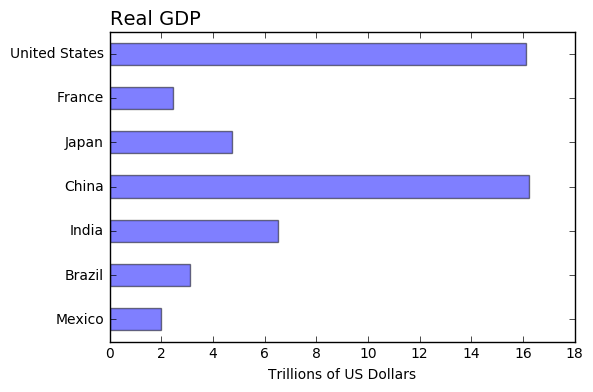

In [48]:
gdp_bar()

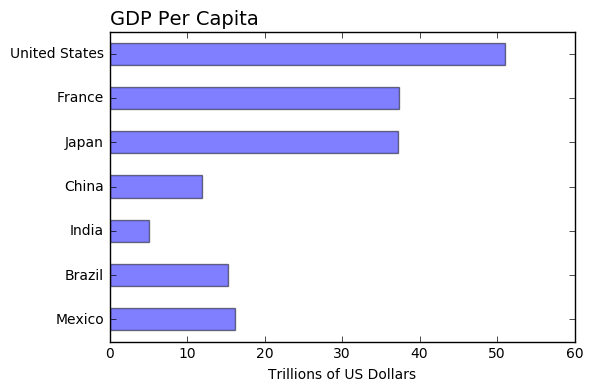

In [49]:
# ditto for GDP per capita (per person)
fig, ax = gdp_bar("gdppc")
ax.set_title('GDP Per Capita', loc='left', fontsize=14)

And just because it's fun, here's an example of Tufte-like axes from [Matplotlib examples](http://matplotlib.org/examples/ticks_and_spines/spines_demo_dropped.html):

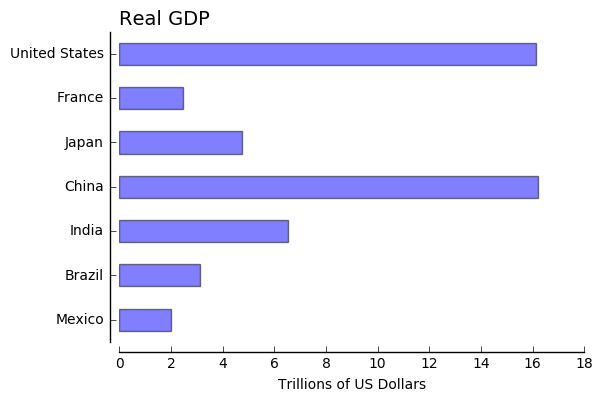

In [50]:
fig, ax = gdp_bar()

# Tufte-like axes
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

**Exercise (challenging).**  Make the ticks point out.  

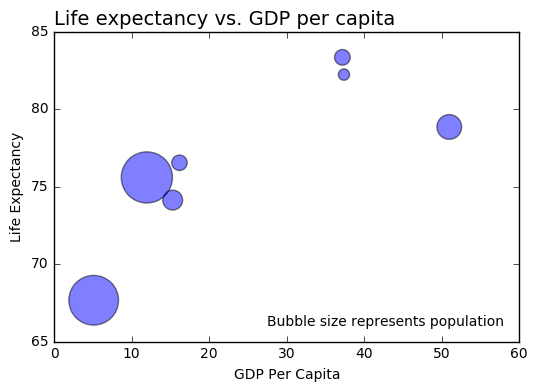

In [51]:
# scatterplot of life expectancy vs gdp per capita
fig, ax = plt.subplots()
ax.scatter(df['gdppc'], df['life'],     # x,y variables
            s=df['pop']/10**6,          # size of bubbles
            alpha=0.5)   
ax.set_title('Life expectancy vs. GDP per capita', loc='left', fontsize=14)
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life Expectancy')
ax.text(58, 66, 'Bubble size represents population', horizontalalignment='right')

**Exercise.** Make the bubble a little larger.  

**Exercise (challenging).** Add labels to the bubbles so we know which country they correspond to.

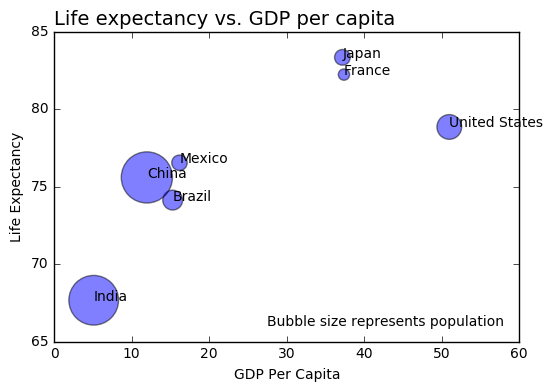

In [52]:
# scatterplot of life expectancy vs gdp per capita
fig, ax = plt.subplots()
ax.scatter(df['gdppc'], df['life'],     # x,y variables
            s=df['pop']/10**6,          # size of bubbles
            alpha=0.5)   
ax.set_title('Life expectancy vs. GDP per capita', loc='left', fontsize=14)
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life Expectancy')
ax.text(58, 66, 'Bubble size represents population', horizontalalignment='right')

for (x, y, country) in zip(df['gdppc'], df['life'], df.index):
    ax.text(x, y, country)

## Styles (optional)

Graph settings you might like.  

(<matplotlib.figure.Figure at 0x7f84700927f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f84700fdfd0>)

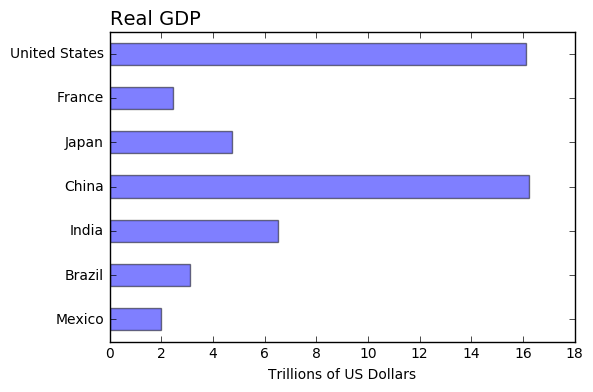

In [53]:
gdp_bar()

**Exercise.**  Create the same graph with this statement at the top:
```python
plt.style.use('fivethirtyeight')
```
(Once we execute this statement, it stays executed.) 

**Comment.** We can get a list of files from `plt.style.available`.  

In [54]:
plt.style.available

['ggplot',
 'bmh',
 'dark_background',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'grayscale',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-notebook',
 'seaborn-muted',
 'seaborn-poster',
 'seaborn-paper',
 'seaborn-deep',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 'seaborn-ticks',
 'seaborn-dark-palette',
 'seaborn-dark',
 'fivethirtyeight']

**Exercise.** Try another one by editing the code below.  

(<matplotlib.figure.Figure at 0x7f846b721748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f846b747860>)

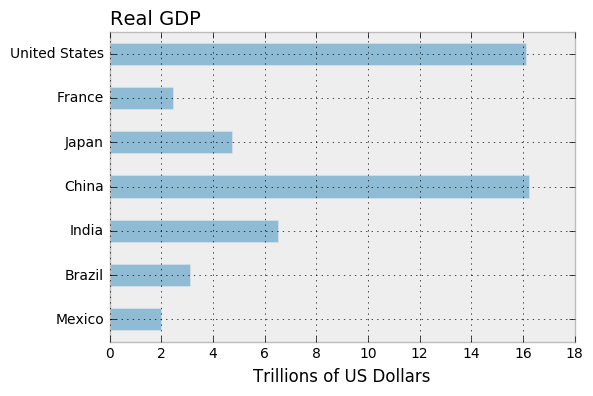

In [55]:
plt.style.use("bmh")
gdp_bar()

**Comment.** For aficionados, the always tasteful [xkcd style](http://xkcd.com/1235/).  

/home/szokeb/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


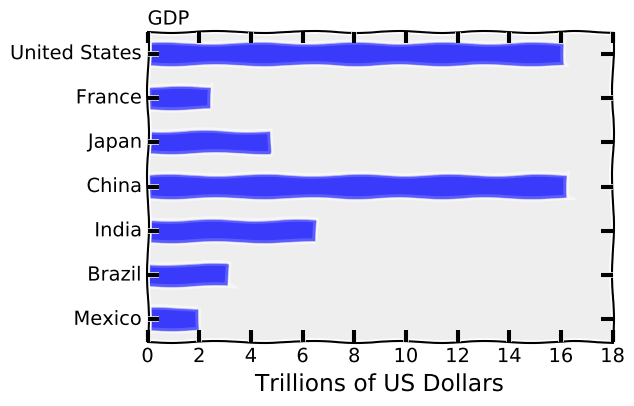

In [56]:
plt.xkcd()
fig, ax = plt.subplots()
df['gdp'].plot(ax=ax, kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

Note the wiggly lines and different font, perfect for suggesting a hand-drawn graph.

**Exercise.** Try one of these styles:  `ggplot`, `bmh`, `dark_background`, and `grayscale`.  Which ones do you like?  Why?

When we're done, we reset the style with these two lines in an code cell:

In [58]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

### Pokemon

In [59]:
url1 = "https://raw.githubusercontent.com/NYUDataBootcamp/Materials/"
url2 = "master/Data/Pokemon.csv"
url = url1 + url2
pokemon = pd.read_csv(url)

In [60]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [61]:
pokemon.shape

(800, 13)

In [62]:
type1s = pokemon["Type 1"].value_counts().sort_index()
type1s

Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Type 1, dtype: int64

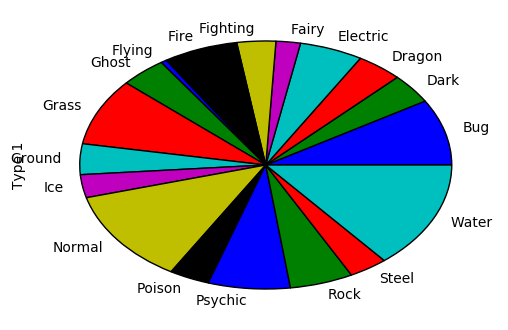

In [63]:
type1s.plot.pie()

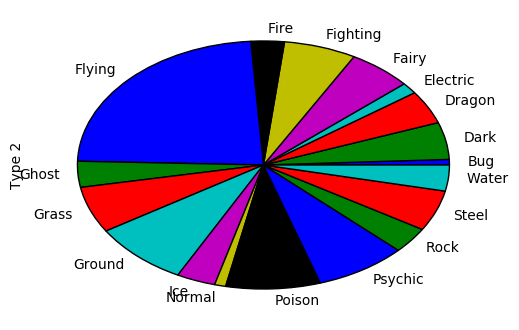

In [64]:
type2s = pokemon["Type 2"].value_counts().sort_index()
type2s.plot.pie()

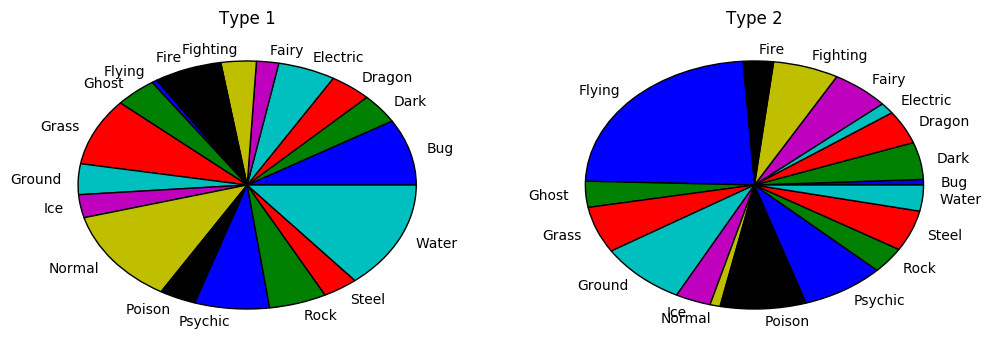

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
type1s.plot.pie(ax=ax[0])
type2s.plot.pie(ax=ax[1])
ax[0].set_title("Type 1")
ax[1].set_title("Type 2")
ax[0].set_ylabel("")
ax[1].set_ylabel("")

In [66]:
pokemon["Generation"].value_counts().sort_index()

1    166
2    106
3    160
4    121
5    165
6     82
Name: Generation, dtype: int64

In [67]:
precent_legendary = (pokemon["Legendary"].sum() / pokemon.shape[0]) * 100
print(precent_legendary, "% of the Pokemon are 'Legendary'")

8.125 % of the Pokemon are 'Legendary'


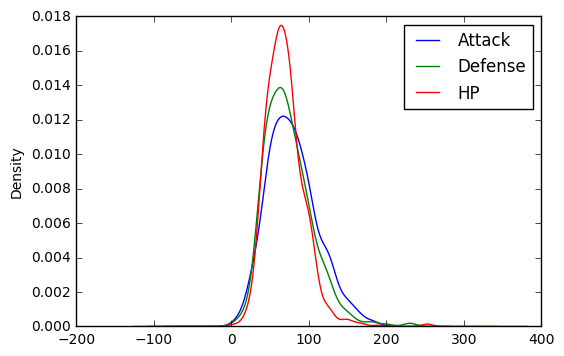

In [68]:
fig, ax = plt.subplots()
pokemon.plot.kde(y=["Attack", "Defense", "HP"], ax=ax)

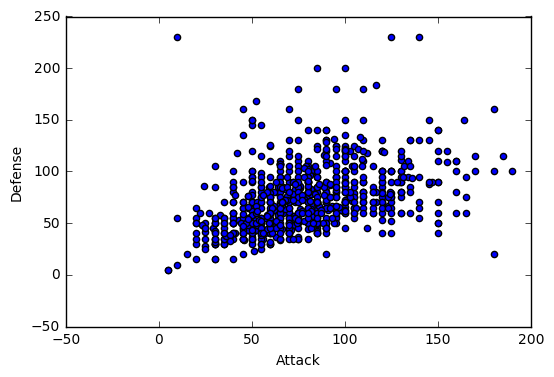

In [69]:
pokemon.plot.scatter(x="Attack", y="Defense")

In [70]:
pokemon[pokemon["Attack"] < 15]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
488,440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False


**Exercise.** Make a histogram of the columns `Sp. Atk`, `Sp. Def`, and `Speed`.

**Exercise.** Make the hisotgrams again, but this time have them be in the same figure, on 3 separate axes (probably 3 rows and one column)

**Exercise.** To your plot with subplots, add a kde plot on top of each histogram. (HINT: you will need to use the `fig, ax = plt.subplots(3, 1)` syntax)

## Review

Consider the data from Randal Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/):

In [72]:
import pandas as pd
data = {'Food': ['French Fries', 'Potato Chips', 'Bacon', 'Pizza', 'Chili Dog'],
        'Calories per 100g':  [607, 542, 533, 296, 260]}
cals = pd.DataFrame(data)

The dataframe `cals` contains the calories in 100 grams of several different foods.


**Exercise.** We'll create and modify visualizations of this data:

* Set `'Food'` as the index of `cals`.
* Create a bar chart with `cals` using figure and axis objects.
* Add a title.
* Change the color of the bars.  What color do you prefer?
* Add the argument `alpha=0.5`.  What does it do?
* Change your chart to a horizontal bar chart.  Which do you prefer?
* *Challenging.*  Eliminate the legend.
* *Challenging.*  Skim the top of Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/). What do you see that you'd like to imitate?

## Where does that leave us?

* We now have several ways to produce graphs.  
* Next up:  think about what we want to graph and why. The tools serve that higher purpose.  